**INTRODUCCIÓN**

El presente trabajo busca la implementación de un modelo de machine learning ára predecir la posibilidad de que un paciente presente un derrame cerebral. El dataset se obtuvo de: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?select=healthcare-dataset-stroke-data.csv


**INFORMACIÓN DE LOS ATRIBUTOS**

1. id: identificador único

2. género: "Masculino", "Femenino" u "Otro"

3. edad: edad del paciente

4. hipertensión: 0 si el paciente no tiene hipertensión, 1 si el paciente tiene
hipertensión

5. enfermedad cardíaca: 0 si el paciente no tiene ninguna enfermedad cardíaca, 1 si el paciente tiene una enfermedad cardíaca

6. alguna vez casado: "No" o "Sí"

7. tipo de trabajo: "niños", "trabajo gubernamental", "nunca ha trabajado", "privado" o "autónomo"

8. tipo de residencia: "rural" o "urbana"

9. nivel promedio de glucosa: nivel promedio de glucosa en sangre

10. IMC: índice de masa corporal

11. estado de tabaquismo: "fumaba anteriormente", "nunca fumó", "fuma" o "Desconocido"

12. accidente cerebrovascular: 1 si el paciente tuvo un accidente cerebrovascular o 0 si no

**IMPORTANDO LIBRERÍAS**

In [184]:
import pandas as pd # data exploration and data analysis
import numpy as np  # linear algebra
import matplotlib.pyplot as plt # ploting
import seaborn as sns  # plotting data
from sklearn.model_selection import train_test_split  # data split in train and test data
from sklearn.preprocessing import MinMaxScaler  # scaling data
from sklearn.svm import SVC # SVM model
from sklearn.metrics import confusion_matrix  # confusion matrix

**CARGANDO EL DATASET**

In [164]:
data_set = pd.read_csv('healthcare-dataset-stroke-data.csv')
data_set.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


**DATA ANÁLISIS**

1. Exploramos el dataset, es posible que existan espacios que deben omitirse o llenar (elementos nulos) o que existan elementos de tipo "categorical"

In [165]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


2. Se observan elementos nulos en el atributo "bmi" , por tanto, decidí rellenar los elementos con el valor medio de este atributo. Usamos el método "decribe( )" para acceder a esta información.

In [166]:
data_set.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [167]:
bmi_mean = data_set['bmi'].mean()
data_set['bmi'].fillna(bmi_mean,inplace=True)
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [168]:
data_set.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1


3. Podemos visualizar la cuenta de los datos para conocer más nuestro data set ya sea con gráficos de barras o histogramas.

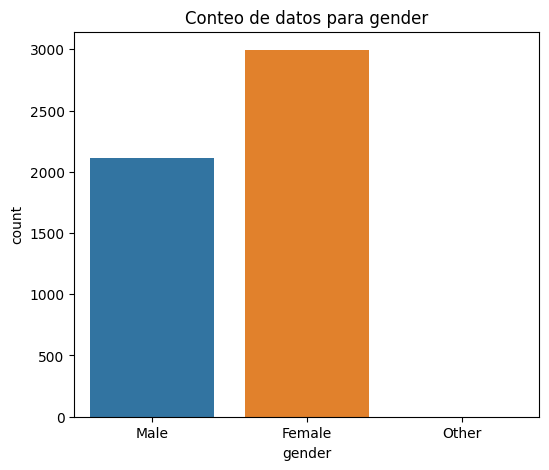

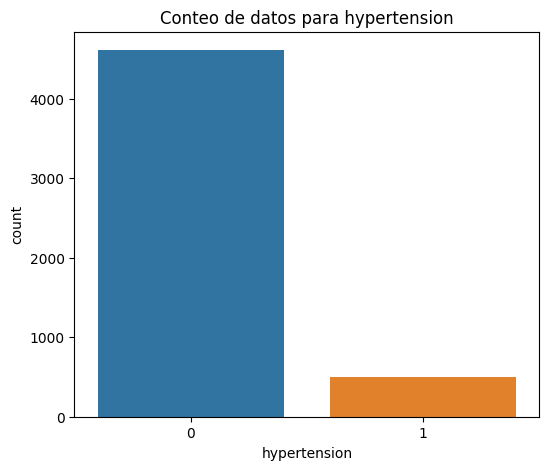

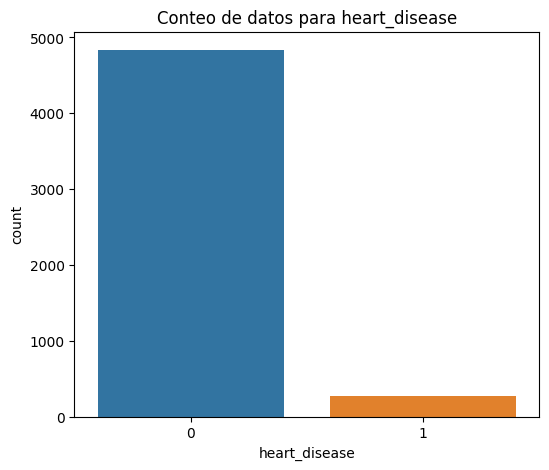

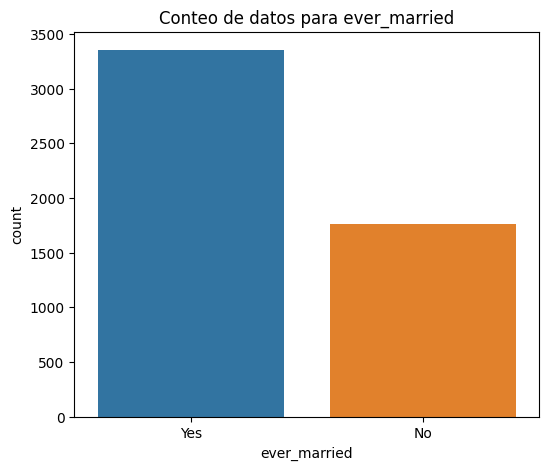

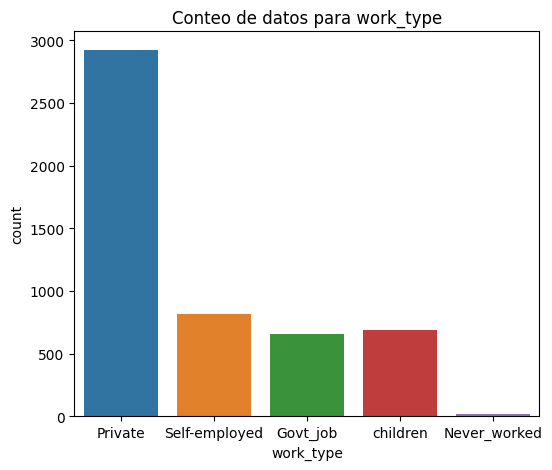

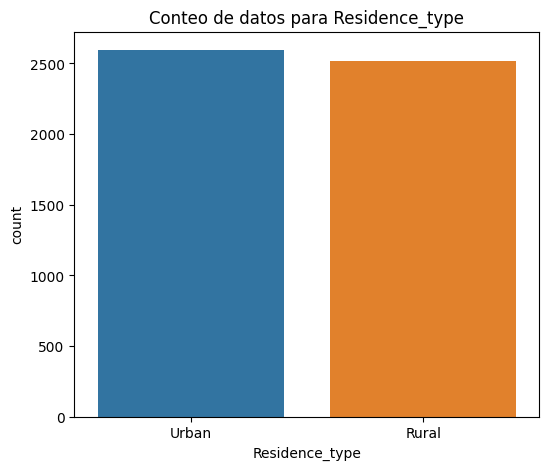

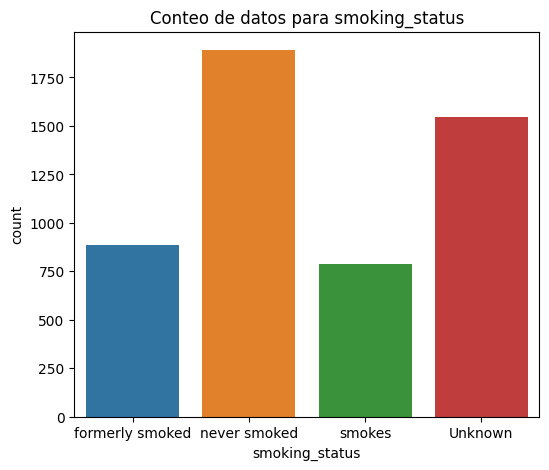

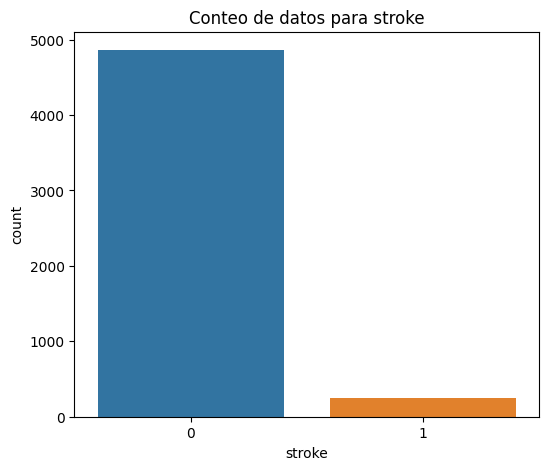

In [169]:
for column in data_set.columns:
  if column in ['age','id','avg_glucose_level','bmi']:
    continue
  plt.figure(figsize=(6,5))
  ax = sns.countplot(x=data_set[column])
  plt.title(f'Conteo de datos para {column}')
  plt.show(ax)

<Figure size 1000x800 with 0 Axes>

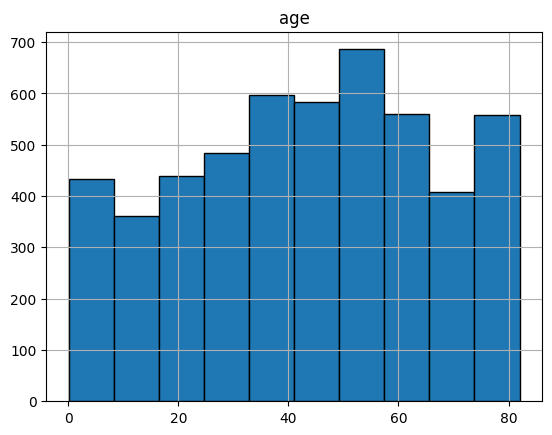

<Figure size 1000x800 with 0 Axes>

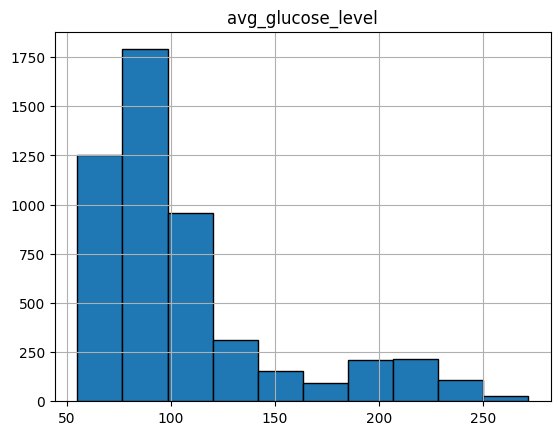

<Figure size 1000x800 with 0 Axes>

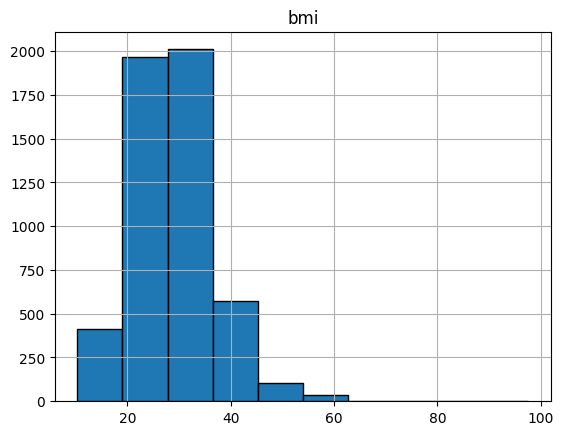

In [170]:
for column in data_set.columns:
  if column in ['age','avg_glucose_level','bmi']:
    plt.figure(figsize=(10,8))
    histogram = data_set.hist(column,edgecolor='black')
    plt.show(histogram)
  else:
    continue

4. Observamos que existen elementos de tipo "categorical" en los atributos: gender, ever_married, work_type, residence_type y smoking_status, así que decidí cambiarlos por valores numéricos.

In [171]:
stroke = data_set['stroke'] # saving labels
dummies = pd.get_dummies(data_set[['gender','ever_married','work_type','Residence_type','smoking_status']],dtype=int)
data_set_preprocessed = data_set.drop(['gender','ever_married','work_type','Residence_type','smoking_status','stroke'],axis=1) # creating a new variable to saved dataset pre-processed
data_set_preprocessed = pd.concat([data_set_preprocessed,dummies,stroke],axis=1)
data_set_preprocessed.head(3)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,9046,67.0,0,1,228.69,36.600000,0,1,0,0,...,1,0,0,0,1,0,1,0,0,1
1,51676,61.0,0,0,202.21,28.893237,1,0,0,0,...,0,1,0,1,0,0,0,1,0,1
2,31112,80.0,0,1,105.92,32.500000,0,1,0,0,...,1,0,0,1,0,0,0,1,0,1


5. Creo una matriz de correlación para visualizar la relavancia de los atributos con respecto al label o target.

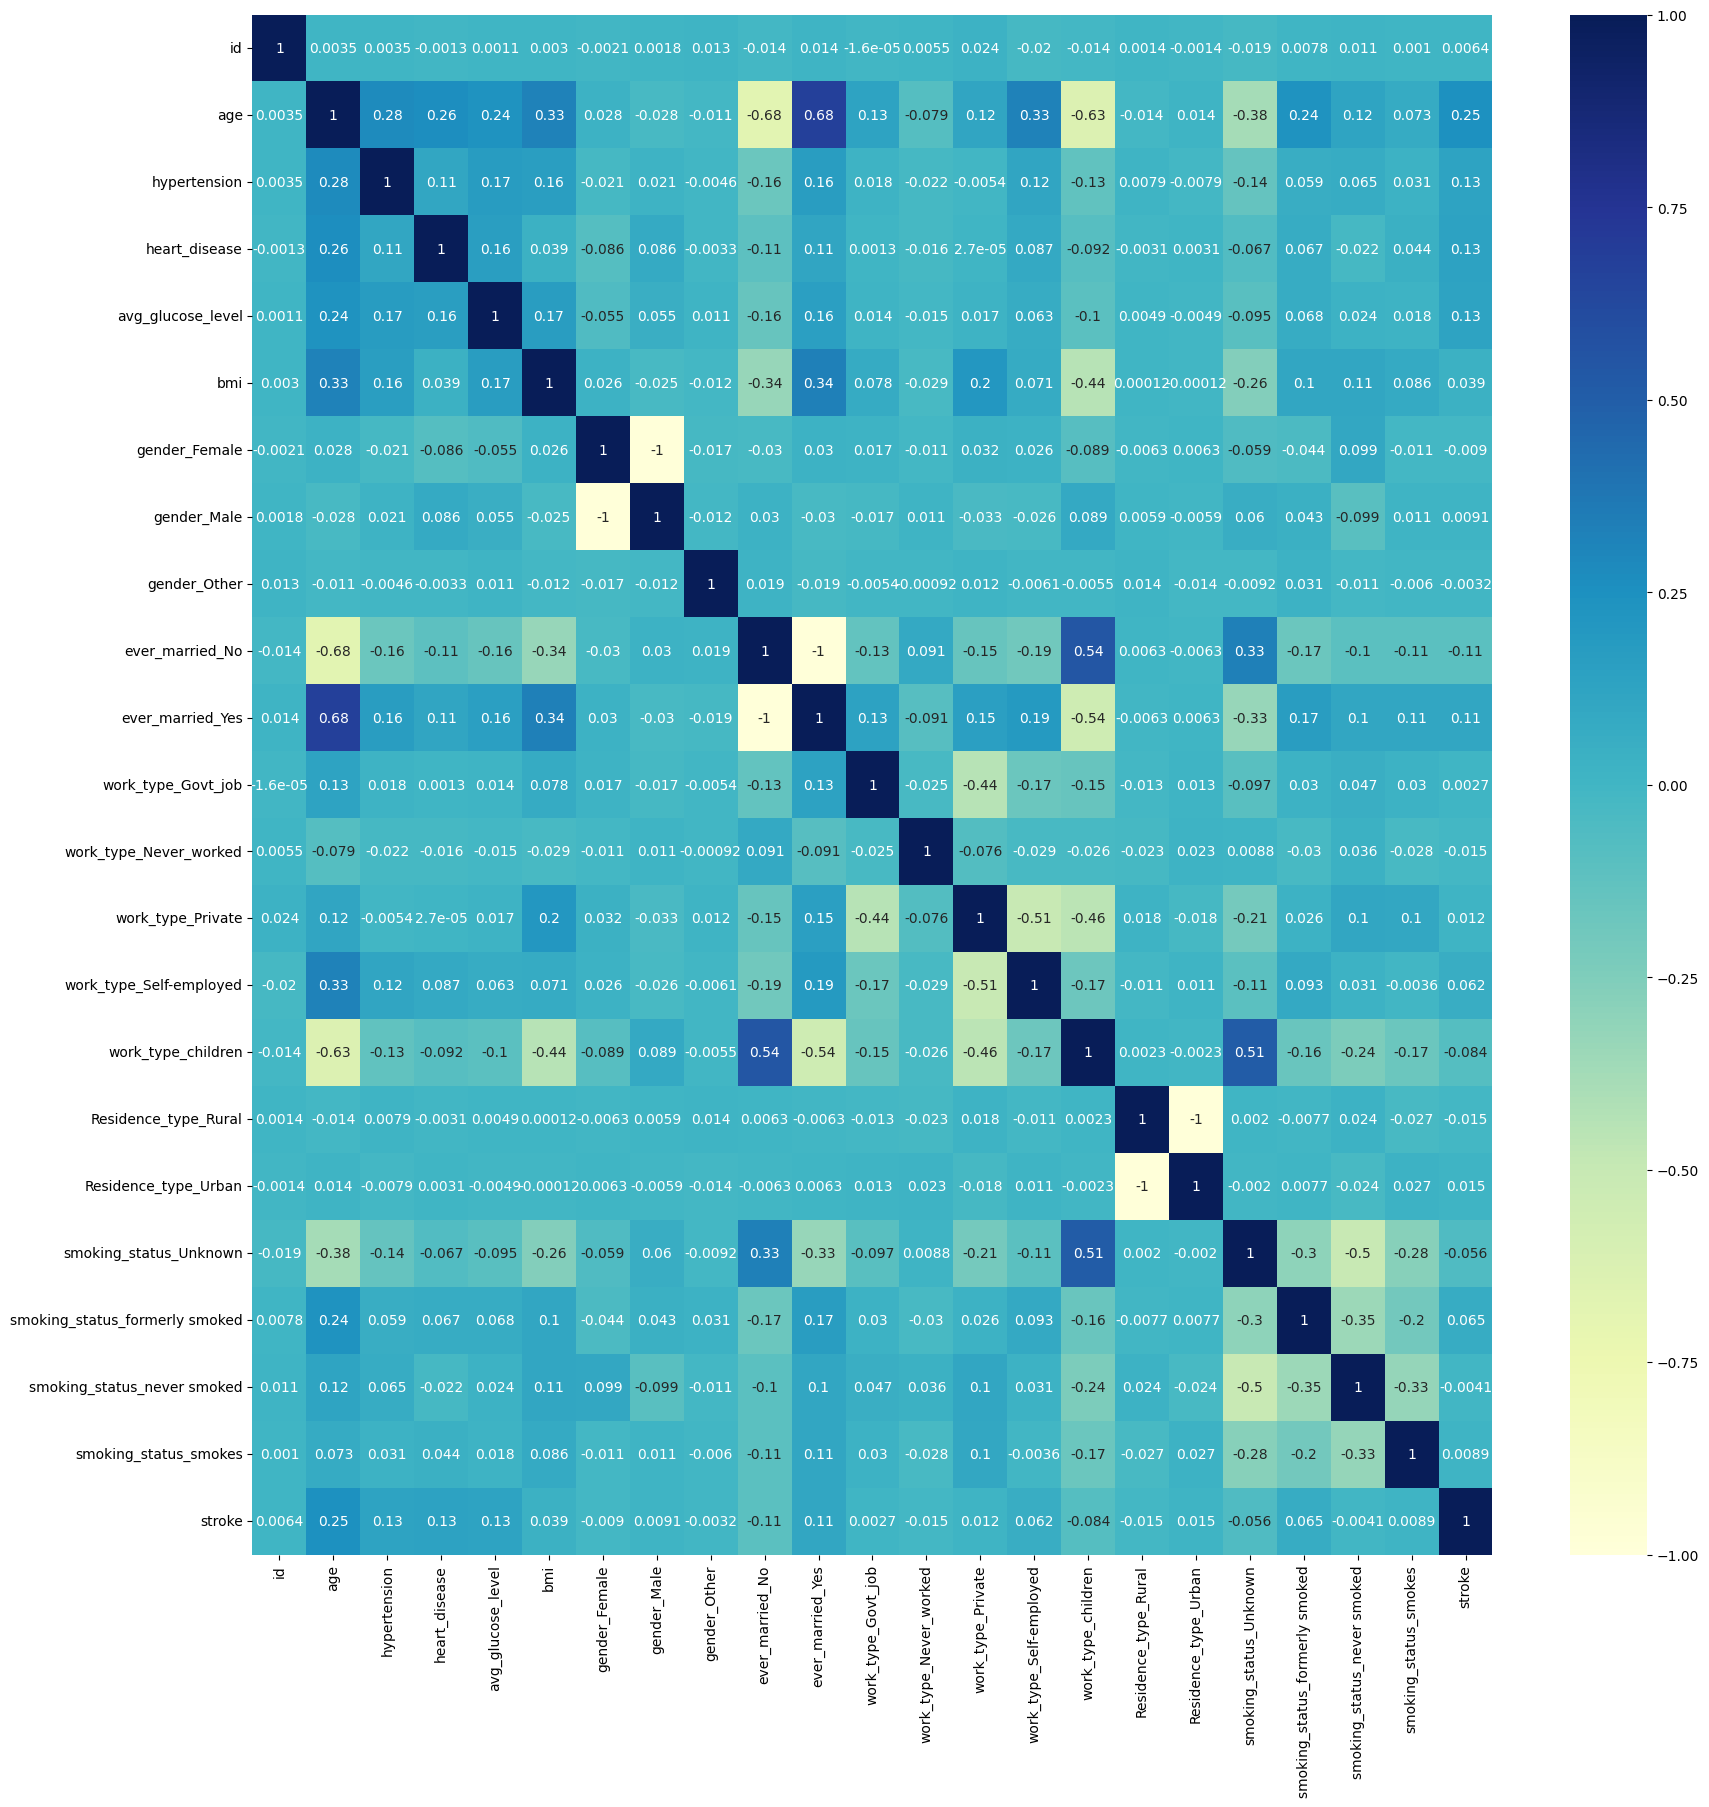

In [172]:
plt.figure(figsize=(20,20))
corr_matrix = data_set_preprocessed.corr()
heat_map = sns.heatmap(corr_matrix,cmap='YlGnBu',annot=True)
plt.show(heat_map)

**PROCESAMIENTO DE DATOS**

1. Escalamos los datos, esto puede ayudar a mejorar el rendimiento de los modelos de clasificación, en este caso, utilizo minMaxScaler para escalar los valores a números entre 0 y 1.

In [173]:
data_set_processed = data_set_preprocessed
minMax_scaler = MinMaxScaler()  # creating minMax scaler
data_set_processed.iloc[:,1:-1] = minMax_scaler.fit_transform(data_set_preprocessed.iloc[:,1:-1]) # scaling data
data_set_processed.head(3)

<ipython-input-173-50476b4d26d9>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_set_processed.iloc[:,1:-1] = minMax_scaler.fit_transform(data_set_preprocessed.iloc[:,1:-1]) # scaling data


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,9046,0.816895,0.0,1.0,0.801265,0.301260,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
1,51676,0.743652,0.0,0.0,0.679023,0.212981,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,31112,0.975586,0.0,1.0,0.234512,0.254296,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1


**IMPLEMENTACIÓN DE SVM CLASSIFIER**

1. Definimos las variables independientes y dependiente X e y

In [174]:
X = data_set_processed.iloc[:,1:-1]
y = data_set_processed.iloc[:,-1]

2. Hacemos un split de los datos para dividir entre datos de entrenamiento y datos de prueba

In [175]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

3. Creamos el modelo de SVM

In [176]:
svm_model = SVC(kernel='linear')

4. Entrenamos el modelo

In [177]:
svm_model.fit(X_train,y_train)

SVC(kernel='linear')

5. Realizamos predicciones del conjunto de prueba

In [183]:
predictions = svm_model.predict(X_test)

6. Evaluamos el acurracy del modelo

In [179]:
print(f'La precisión del modelo es de {svm_model.score(X_test,y_test)}')

La precisión del modelo es de 0.9393346379647749


7. Finalmente creamos la matriz de confusión para visualizar gráficamente la comparación entre las predicciones y los valores reales

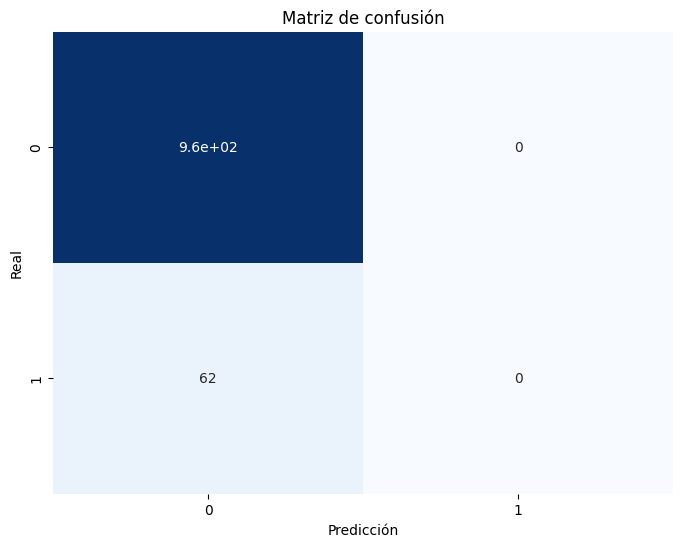

In [201]:
plt.figure(figsize=(8,6))
mat_confussion = confusion_matrix(y_test,predictions)
heat_map_2 = sns.heatmap(mat_confussion, annot=True, cmap='Blues',cbar=False)
plt.title('Matriz de confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()